In [73]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import datetime
from collections import Counter
%matplotlib inline


In [74]:
rtrap_df = pd.read_csv('rtrap-2012-5-20-2020-5-15.csv')
rtrap_df.head(50)

,Submission ID,Title,Url,Author,Score,Body Text,Date Created,Date Created UTC,Comments,Permalink
0,tybhx,Hudson Mohawk - Gooo,http://www.youtube.com/watch?v=wh947EV_dyM,cc132,8,NaN,2012-05-21 16:23:59,1337642639,1,/r/trap/comments/tybhx/hudson_mohawk_gooo/
1,tybj9,Baauer - Harlem Shake,http://www.youtube.com/watch?v=Bk1_DbbzSdY,cc132,21,NaN,2012-05-21 16:24:32,1337642672,1,/r/trap/comments/tybj9/baauer_harlem_shake/
2,tyblt,Three Six Mafia - Rainbow Colors,http://www.youtube.com/watch?v=5nyZ7rx9-Cc,cc132,0,NaN,2012-05-21 16:25:46,1337642746,0,/r/trap/comments/tyblt/three_six_mafia_rainbow...
3,tybn2,Caracal - Elements,http://www.youtube.com/watch?v=ZZTu0nVYDRg,cc132,2,NaN,2012-05-21 16:26:21,1337642781,0,/r/trap/comments/tybn2/caracal_elements/
4,tybog,LOL Gurlz - Pussy Out The Shower Ha,http://soundcloud.com/lolgurlz4real/lolgurlz-p...,[deleted],0,NaN,2012-05-21 16:27:07,1337642827,0,/r/trap/comments/tybog/lol_gurlz_pussy_out_the...
5,tybrh,Major Lazer - Original Don (Flosstradamus Remix),http://soundcloud.com/flosstradamus/major-laze...,cc132,79,NaN,2012-05-21 16:28:43,1337642923,2,/r/trap/comments/tybrh/major_lazer_original_do...
6,u1mw3,Rustie - City Star,http://www.youtube.com/watch?v=iKm1m1NJysk,barbados_slim92,8,NaN,2012-05-23 14:15:48,1337807748,0,/r/trap/comments/u1mw3/rustie_city_star/
7,u1t6y,Lōtic - Rendez-vous (Ben Aqua #bvs Remix) by B...,http://soundcloud.com/benaqua/lotic-rendez-vou...,_something_else,0,NaN,2012-05-23 16:13:18,1337814798,0,/r/trap/comments/u1t6y/lōtic_rendezvous_ben_aq...
8,u479i,Trap On Acid - RL Grime,https://soundcloud.com/rlgrime/trap-on-acid-rl...,lifeofthunder,12,NaN,2012-05-25 01:14:03,1337933643,0,/r/trap/comments/u479i/trap_on_acid_rl_grime/
9,u7yip,Eliminate - Devil Theory,http://electronicdancemusic.com/eliminate/devi...,electronicdancemusic,4,NaN,2012-05-27 17:21:13,1338164473,1,/r/trap/comments/u7yip/eliminate_devil_theory/


In [75]:
rtrap_df['Title'] = rtrap_df['Title'].str.strip()
rtrap_df['Title'] = rtrap_df['Title'].str.replace(r'amp;', '') # remove ampersand artifact

In [76]:
rtrap_df['Title'] = rtrap_df['Title'].str.upper() # normalize string to all uppercase
# handle unique artist cases
rtrap_df['Title'] = rtrap_df['Title'].str.replace(r'(KRNE)', 'KRANE') 
rtrap_df['Title'] = rtrap_df['Title'].str.replace(r'(JACK Ü)', 'JACK U') 
rtrap_df['Title'] = rtrap_df['Title'].str.replace(r'(KRNE)', 'KRANE') 
rtrap_df['Title'] = rtrap_df['Title'].str.replace(r'(G-JONES)', 'G JONES')
rtrap_df['Title'] = rtrap_df['Title'].str.replace(r'(G-REX)', 'G REX')
rtrap_df['Title'] = rtrap_df['Title'].str.replace(r'(G-DRAGON)', 'G DRAGON')
rtrap_df['Title'] = rtrap_df['Title'].str.replace(r'(G-BUCK)', 'G BUCK')
rtrap_df['Title'] = rtrap_df['Title'].str.replace(r'(G-EAZY)', 'G EAZY')
rtrap_df['Title'] = rtrap_df['Title'].str.replace(r'(MR CARMACK)|(MR•CAR/\\ACK)', 'MR. CARMACK') 
rtrap_df['Title'] = rtrap_df['Title'].str.replace(r'(T-PAIN)', 'T PAIN') 
rtrap_df['Title'] = rtrap_df['Title'].str.replace(r'(A-TRAK)', 'A TRAK') 
rtrap_df['Title'] = rtrap_df['Title'].str.replace(r'(TYNVN)', 'TYNAN') 
rtrap_df['Title'] = rtrap_df['Title'].str.replace(r'(1788-L)', '1788L') 
rtrap_df['Title'] = rtrap_df['Title'].str.replace(r'(︻╦╤─ ƱZ ─╤╦︻)|(ƱZ)', 'UZ') 

In [77]:
rtrap_df['Date Created'] = rtrap_df['Date Created'].str[:10] # remove h:m:s in datetime

In [78]:
# split dataframe by year
rtrap_2012 = rtrap_df[rtrap_df['Date Created'].between('2012-01-01', '2012-12-31')]
rtrap_2013 = rtrap_df[rtrap_df['Date Created'].between('2013-01-01', '2013-12-31')]
rtrap_2014 = rtrap_df[rtrap_df['Date Created'].between('2014-01-01', '2014-12-31')]
rtrap_2015 = rtrap_df[rtrap_df['Date Created'].between('2015-01-01', '2015-12-31')]
rtrap_2016 = rtrap_df[rtrap_df['Date Created'].between('2016-01-01', '2016-12-31')]
rtrap_2017 = rtrap_df[rtrap_df['Date Created'].between('2017-01-01', '2017-12-31')]
rtrap_2018 = rtrap_df[rtrap_df['Date Created'].between('2018-01-01', '2018-12-31')]
rtrap_2019 = rtrap_df[rtrap_df['Date Created'].between('2019-01-01', '2019-12-31')]
rtrap_by_date = [rtrap_2012, rtrap_2013, rtrap_2014, rtrap_2015, rtrap_2016, 
                rtrap_2017, rtrap_2018, rtrap_2019]

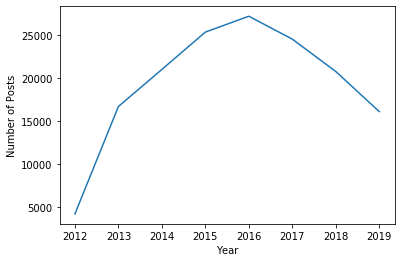

In [79]:
# number of posts per year
plt.plot(['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
         [len(r) for r in rtrap_by_date])
plt.ylabel('Number of Posts')
plt.xlabel('Year')
plt.show()

In [80]:
total = len(rtrap_df)
print(total)
yt = rtrap_df['Url'].str.contains(r'youtube').sum()
sc = rtrap_df['Url'].str.contains(r'soundcloud').sum()
sp = rtrap_df['Url'].str.contains(r'spotify').sum()
print('Number of YT URLS: ' + str(yt))
print('Number of SC URLS: ' + str(sc))
print('Number of SP URLS: ' + str(sp))
print('Remaining Urls Not YT/SC/SP: ' + str(len(rtrap_df)-(yt+sc+sp)) + ' Percentage: ' + str(round((100*(len(rtrap_df)-(yt+sc+sp)) / total), 2)))

161866
Number of YT URLS: 20989
Number of SC URLS: 88888
Number of SP URLS: 4931
Remaining Urls Not YT/SC/SP: 47058 Percentage: 29.07


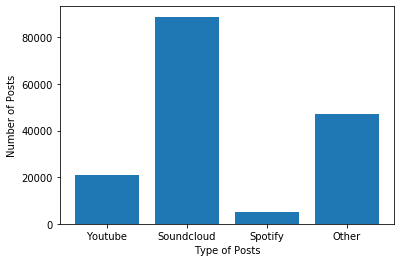

In [81]:
total = len(rtrap_df)
yt = rtrap_df['Url'].str.contains(r'youtube').sum()
sc = rtrap_df['Url'].str.contains(r'soundcloud').sum()
sp = rtrap_df['Url'].str.contains(r'spotify').sum()

plt.bar(['Youtube', 'Soundcloud', 'Spotify', 'Other'], 
        [yt, sc, sp, total-(yt+sc+sp)])
plt.ylabel('Number of Posts')
plt.xlabel('Type of Posts')
plt.show()

In [82]:
# Note: most titles of track submissions are of the format "Artist - Track"
# Varying combinations of "[FLAIR] Artist_1 & Artist_2 - Track (Artist_3 Remix)" need to be considered

front = re.compile(r'(.+?(?=( )?-))') # regex to get all before "-" (artist)
flairs = '[FREE]', '[TRAP]', '[THROWBACK]', '[DUBSTEP]', '[FRESH]', '[DUBSTEP ELEMENTS]'
flairs_pattern = '|'.join(map(re.escape, flairs)) # regex to look for to remove flairs
collabs = ' & ', ' + ', ' X ', 'FT. ', 'FEAT. ', ', '
collabs_pattern = '|'.join(map(re.escape, collabs)) # regex to look for for multiple artists 

back = re.compile(r'((?<=- ).*)') # regex to get all after "-" (track)
# regex to get track name before any parantheses indicating a remix/edit/flip/vip
track_before_parans_pattern = re.compile(r'(.+?(?=(\((.+?)\))|(\[(.+?)\])))') 
remix_paran_pattern = re.compile(r'(\((.+?)\))|(\[(.+?)\])') # regex to get string in parantheses
remixes = 'REMIX', 'EDIT', 'FLIP', 'VIP'
# regex to get artist name that is between an open parathesis and string
artist_extract_pattern = re.compile(r'((?<=(\[|\())(.*?)(?=( VIP)|( REMIX)|( FLIP)|( EDIT)))')

for index, row in rtrap_df.iterrows():    
    artist = []
    front_part = front.search(row[1])
    # if title is in ARTIST - TRACK format, remove flairs and extra parantheses, thus keeping pure ARTIST string
    if front_part is not None: 
        front_part = re.sub(flairs_pattern, '', front_part.group(0))
        front_part = front_part.replace('(', '').replace(')', '').replace('[', '').replace(']', '')
        # if there exists any of the strings in the collabs list indicating multiple artists, split by those strings.
        # else, just append to artist list
        if any(collab in front_part for collab in collabs):
            split = re.split(collabs_pattern, front_part)
            for s in split:
                artist.append(s.strip())
                
        else:
            artist.append(front_part.strip())
    
    track = []
    back_part = back.search(row[1])
    # if title is in ARTIST - TRACK format, extract everything in the TRACK section of string
    if back_part is not None:
        remix_extract = re.search(remix_paran_pattern, back_part.group(0))
        # if found parantheses in the TRACK section of string, look for track name before paranthesis
        if remix_extract:
            track_extract = re.search(track_before_parans_pattern, back_part.group(0))
            # if track name does exist, append to track list 
            if track_extract:
                track.append(track_extract.group(0).strip())
            # if any of the remix strings exist in the string in the parantheses, look for artist name before string
            if any(remix in remix_extract.group(0) for remix in remixes):
                artist_extract = re.search(artist_extract_pattern, remix_extract.group(0))
                # if artist name does exist, replace original artist(s) i.e. give credit to the remix artist
                if artist_extract:
                    artist = [artist_extract.group(0).strip()]
        else:
            track.append(back_part.group(0).strip())
    
    rtrap_df.at[index, 'Artist'] = artist
    rtrap_df.at[index, 'Track'] = track
    

In [83]:
rtrap_df.head(20)

,Submission ID,Title,Url,Author,Score,Body Text,Date Created,Date Created UTC,Comments,Permalink,Artist,Track
0,tybhx,HUDSON MOHAWK - GOOO,http://www.youtube.com/watch?v=wh947EV_dyM,cc132,8,NaN,2012-05-21,1337642639,1,/r/trap/comments/tybhx/hudson_mohawk_gooo/,HUDSON MOHAWK,GOOO
1,tybj9,BAAUER - HARLEM SHAKE,http://www.youtube.com/watch?v=Bk1_DbbzSdY,cc132,21,NaN,2012-05-21,1337642672,1,/r/trap/comments/tybj9/baauer_harlem_shake/,[BAAUER],[HARLEM SHAKE]
2,tyblt,THREE SIX MAFIA - RAINBOW COLORS,http://www.youtube.com/watch?v=5nyZ7rx9-Cc,cc132,0,NaN,2012-05-21,1337642746,0,/r/trap/comments/tyblt/three_six_mafia_rainbow...,[THREE SIX MAFIA],[RAINBOW COLORS]
3,tybn2,CARACAL - ELEMENTS,http://www.youtube.com/watch?v=ZZTu0nVYDRg,cc132,2,NaN,2012-05-21,1337642781,0,/r/trap/comments/tybn2/caracal_elements/,[CARACAL],[ELEMENTS]
4,tybog,LOL GURLZ - PUSSY OUT THE SHOWER HA,http://soundcloud.com/lolgurlz4real/lolgurlz-p...,[deleted],0,NaN,2012-05-21,1337642827,0,/r/trap/comments/tybog/lol_gurlz_pussy_out_the...,[LOL GURLZ],[PUSSY OUT THE SHOWER HA]
5,tybrh,MAJOR LAZER - ORIGINAL DON (FLOSSTRADAMUS REMIX),http://soundcloud.com/flosstradamus/major-laze...,cc132,79,NaN,2012-05-21,1337642923,2,/r/trap/comments/tybrh/major_lazer_original_do...,[FLOSSTRADAMUS],[ORIGINAL DON]
6,u1mw3,RUSTIE - CITY STAR,http://www.youtube.com/watch?v=iKm1m1NJysk,barbados_slim92,8,NaN,2012-05-23,1337807748,0,/r/trap/comments/u1mw3/rustie_city_star/,[RUSTIE],[CITY STAR]
7,u1t6y,LŌTIC - RENDEZ-VOUS (BEN AQUA #BVS REMIX) BY B...,http://soundcloud.com/benaqua/lotic-rendez-vou...,_something_else,0,NaN,2012-05-23,1337814798,0,/r/trap/comments/u1t6y/lōtic_rendezvous_ben_aq...,[BEN AQUA #BVS],[RENDEZ-VOUS]
8,u479i,TRAP ON ACID - RL GRIME,https://soundcloud.com/rlgrime/trap-on-acid-rl...,lifeofthunder,12,NaN,2012-05-25,1337933643,0,/r/trap/comments/u479i/trap_on_acid_rl_grime/,[TRAP ON ACID],[RL GRIME]
9,u7yip,ELIMINATE - DEVIL THEORY,http://electronicdancemusic.com/eliminate/devi...,electronicdancemusic,4,NaN,2012-05-27,1338164473,1,/r/trap/comments/u7yip/eliminate_devil_theory/,[ELIMINATE],[DEVIL THEORY]


In [84]:
rtrap_df.to_csv('rtrap-2012-5-20-2020-5-15[CLEANED].csv')

In [85]:
all_artists = []
for index,row in rtrap_df.iterrows():    
    if isinstance(row[10], list):
        for artist in row[10]:
            all_artists.append(artist)
    else:
        all_artists.append(row[10])

In [86]:
unique_artists = set(all_artists)

In [87]:
threshold = 15
artist_counts = {artist:all_artists.count(artist) for artist in unique_artists if all_artists.count(artist) > threshold}

In [88]:
print(len(artist_counts))

1136


In [89]:
count = Counter(artist_counts)
for k, v in count.most_common(20):
    print('%s: %i' % (k, v))

RL GRIME: 712
MR. CARMACK: 597
BAAUER: 438
NGHTMRE: 390
FLOSSTRADAMUS: 387
SKRILLEX: 376
WHAT SO NOT: 345
QUIX: 343
UZ: 339
YELLOW CLAW: 337
TROYBOI: 313
FLUME: 291
HOLLY: 284
DJ SNAKE: 276
KRANE: 265
DILLON FRANCIS: 262
DIPLO: 259
GTA: 252
BOOMBOX CARTEL: 250
EKALI: 239


In [90]:
artist_votes = {}
for index,row in rtrap_df.iterrows():    
    if isinstance(row[10], list):
        for artist in row[10]:
            if artist not in artist_votes:
                artist_votes[artist] = row[4]
            else:
                artist_votes[artist] = artist_votes[artist] + row[4]
    else:
            if artist not in artist_votes:
                artist_votes[artist] = row[4]
            else:
                artist_votes[artist] = artist_votes[artist] + row[4]


In [91]:
votes = Counter(artist_votes)
for k, v in votes.most_common(20):
    print('%s: %i' % (k, v))

RL GRIME: 40345
BAAUER: 15015
WHAT SO NOT: 14714
EKALI: 14279
SKRILLEX: 13391
MR. CARMACK: 12566
FLUME: 12173
NGHTMRE: 11393
QUIX: 9602
UZ: 9370
TROYBOI: 8964
KRANE: 7940
BOOMBOX CARTEL: 7824
DILLON FRANCIS: 7814
FLOSSTRADAMUS: 7226
DJ SNAKE: 7221
GTA: 6977
YELLOW CLAW: 6841
MURA MASA: 6807
GETTER: 6625


In [92]:
artist_stats = {}
for artist in artist_counts.keys():
    artist_stats[artist] = {'Tracks': artist_counts[artist], 
                            'Votes': artist_votes[artist], 
                            'Vote/Track': round(artist_votes[artist]/artist_counts[artist], 2)}

In [93]:
for key, value in sorted(artist_stats.items(), key=lambda item: item[1]['Vote/Track'], reverse=True):
    print("%s: %s" % (key, value))

RICH CHIGGA: {'Tracks': 22, 'Votes': 2354, 'Vote/Track': 107.0}
SHAWN WASABI: {'Tracks': 21, 'Votes': 2005, 'Vote/Track': 95.48}
PINK GUY: {'Tracks': 21, 'Votes': 1290, 'Vote/Track': 61.43}
EKALI: {'Tracks': 239, 'Votes': 14279, 'Vote/Track': 59.74}
RL GRIME: {'Tracks': 712, 'Votes': 40345, 'Vote/Track': 56.66}
VINCENT: {'Tracks': 98, 'Votes': 5043, 'Vote/Track': 51.46}
VINCE STAPLES: {'Tracks': 23, 'Votes': 1157, 'Vote/Track': 50.3}
DOG BLOOD: {'Tracks': 18, 'Votes': 849, 'Vote/Track': 47.17}
ZHU: {'Tracks': 82, 'Votes': 3512, 'Vote/Track': 42.83}
WHAT SO NOT: {'Tracks': 345, 'Votes': 14714, 'Vote/Track': 42.65}
KNIFE PARTY: {'Tracks': 39, 'Votes': 1638, 'Vote/Track': 42.0}
FLUME: {'Tracks': 291, 'Votes': 12173, 'Vote/Track': 41.83}
DELAY.: {'Tracks': 22, 'Votes': 884, 'Vote/Track': 40.18}
OG MACO: {'Tracks': 16, 'Votes': 639, 'Vote/Track': 39.94}
STÖÖKI SOUND: {'Tracks': 37, 'Votes': 1416, 'Vote/Track': 38.27}
EPROM: {'Tracks': 127, 'Votes': 4750, 'Vote/Track': 37.4}
HEX COUGAR: {'Tr

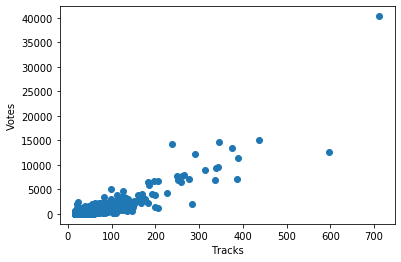

In [94]:
x = [artist_stats[artist]['Tracks'] for artist in artist_stats]
y = [artist_stats[artist]['Votes'] for artist in artist_stats]
plt.xlabel('Tracks')
plt.ylabel('Votes')
plt.scatter(x, y)
plt.show()

In [95]:
rtrap_clean = pd.read_csv('rtrap-2012-5-20-2020-5-15[CLEANED].csv')
rtrap_clean.head()

,Unnamed: 0,Submission ID,Title,Url,Author,Score,Body Text,Date Created,Date Created UTC,Comments,Permalink,Artist,Track
0,0,tybhx,HUDSON MOHAWK - GOOO,http://www.youtube.com/watch?v=wh947EV_dyM,cc132,8,NaN,2012-05-21,1337642639,1,/r/trap/comments/tybhx/hudson_mohawk_gooo/,HUDSON MOHAWK,GOOO
1,1,tybj9,BAAUER - HARLEM SHAKE,http://www.youtube.com/watch?v=Bk1_DbbzSdY,cc132,21,NaN,2012-05-21,1337642672,1,/r/trap/comments/tybj9/baauer_harlem_shake/,['BAAUER'],['HARLEM SHAKE']
2,2,tyblt,THREE SIX MAFIA - RAINBOW COLORS,http://www.youtube.com/watch?v=5nyZ7rx9-Cc,cc132,0,NaN,2012-05-21,1337642746,0,/r/trap/comments/tyblt/three_six_mafia_rainbow...,['THREE SIX MAFIA'],['RAINBOW COLORS']
3,3,tybn2,CARACAL - ELEMENTS,http://www.youtube.com/watch?v=ZZTu0nVYDRg,cc132,2,NaN,2012-05-21,1337642781,0,/r/trap/comments/tybn2/caracal_elements/,['CARACAL'],['ELEMENTS']
4,4,tybog,LOL GURLZ - PUSSY OUT THE SHOWER HA,http://soundcloud.com/lolgurlz4real/lolgurlz-p...,[deleted],0,NaN,2012-05-21,1337642827,0,/r/trap/comments/tybog/lol_gurlz_pussy_out_the...,['LOL GURLZ'],['PUSSY OUT THE SHOWER HA']


In [96]:
# get top 100 most voted artists
top_100_voted = [k for k, v in votes.most_common(100)]
    

In [97]:
daterange = pd.date_range('2012-05-01','2020-05-16', freq='MS').strftime("%Y-%m-%d").tolist()
print(daterange)
len(daterange)

['2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01', '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018

97

In [98]:
df1 = pd.DataFrame(top_100_voted, columns=['Artist'])
df2 = pd.DataFrame([], columns=daterange)

In [127]:
racing_chart_df = pd.concat([df1, df2], axis=1)
racing_chart_df.head()

,Artist,2012-05-01,2012-06-01,2012-07-01,2012-08-01,2012-09-01,2012-10-01,2012-11-01,2012-12-01,2013-01-01,...,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01
0,RL GRIME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAAUER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WHAT SO NOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EKALI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SKRILLEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
l = len(daterange)
rolling_sum = {}
for index, d in enumerate(daterange):
    after = d
    if index+1 == l:
        before = '2099-01-01'
    else:
        before = str(datetime.datetime.strptime(daterange[index + 1], '%Y-%m-%d') - datetime.timedelta(days=1))
    temp_df = rtrap_df[rtrap_df['Date Created'].between(after, before)]
    for j, row in temp_df.iterrows():
        if isinstance(row[10], list):
            for artist in row[10]:
                if artist in top_100_voted:
                    if artist not in rolling_sum:
                        rolling_sum[artist] = row[4]
                    else:
                        rolling_sum[artist] += row[4]
        else:
            if artist in top_100_voted:
                    if artist not in rolling_sum:
                        rolling_sum[artist] = row[4]
                    else:
                        rolling_sum[artist] += row[4]

    for a in rolling_sum: 
        idx = racing_chart_df.loc[racing_chart_df['Artist'] == a].index[0]
        racing_chart_df.at[idx, after] = rolling_sum[a]              
                        

In [129]:
racing_chart_df.head()

,Artist,2012-05-01,2012-06-01,2012-07-01,2012-08-01,2012-09-01,2012-10-01,2012-11-01,2012-12-01,2013-01-01,...,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01
0,RL GRIME,NaN,1,1,10,36,126,127,172,210,...,36617,36791,40324,40336,40338,40338,40340,40342,40343,40345
1,BAAUER,21,109,383,483,614,727,809,987,1697,...,14849,14849,14992,14992,14994,14994,14994,14995,15009,15015
2,WHAT SO NOT,NaN,NaN,NaN,54,54,54,56,58,69,...,14554,14706,14706,14707,14709,14711,14711,14713,14714,14714
3,EKALI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14039,14201,14264,14269,14269,14274,14278,14278,14278,14279
4,SKRILLEX,NaN,NaN,NaN,0,0,0,0,0,0,...,13245,13289,13290,13290,13296,13385,13387,13390,13391,13391


In [130]:
racing_chart_df.fillna(0, inplace=True)
racing_chart_df.to_excel(r'racing_chart.xlsx')